In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("sonar.csv")

In [4]:
# Dimension du jeu de données
print(f"Dimension du jeu de données: {df.shape}")

# Types des données
print(f"Types des données: {df.dtypes}")

# Aperçu des données
print("Aperçu des données:")
print(df.head())

# Résumé statistique
print("\nRésumé statistique:")
print(df.describe())

# Répartition des classes de données
print("\nRépartition des classes de données:")
print(df.value_counts())


Dimension du jeu de données: (207, 61)
Types des données: 0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object
Aperçu des données:
   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ..

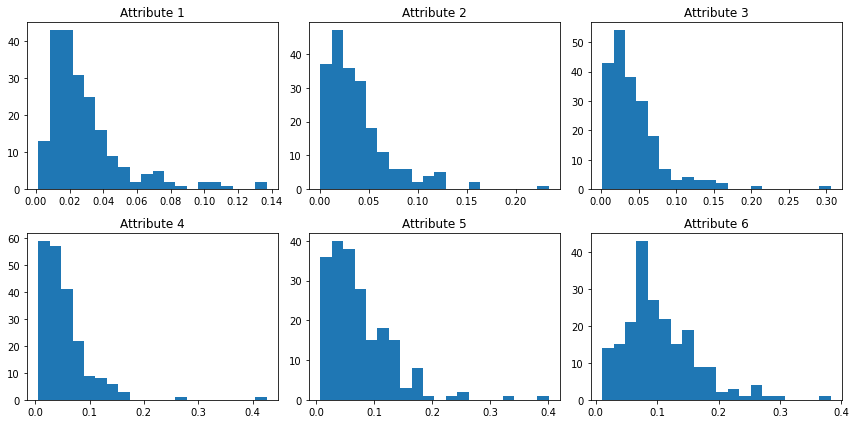

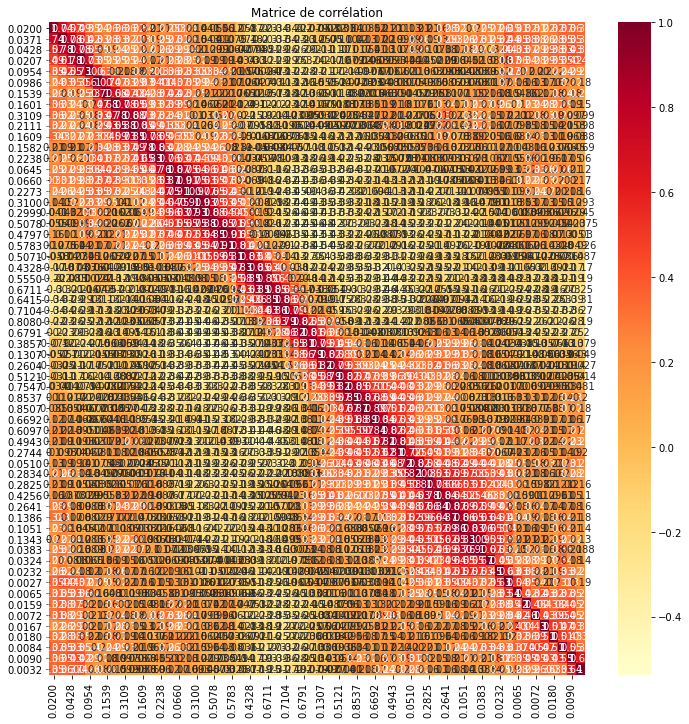

In [5]:
# Histogrammes
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.hist(df.iloc[:, i], bins=20)
    plt.title(f"Attribute {i+1}")
plt.tight_layout()
plt.show()

# Matrice de corrélation
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap="YlOrRd")
plt.title("Matrice de corrélation")
plt.show()


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import cross_val_score

def evaluate_model(model):
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    return scores.mean()


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

for model in models:
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {evaluate_model(model):.2f}")


Model: LogisticRegression


NameError: name 'X' is not defined

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.pipeline import Pipeline

def evaluate_model_with_scaling(model):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
    return scores.mean()


In [10]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC()
]

for model in models:
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {evaluate_model_with_scaling(model):.2f}")


Model: LogisticRegression
Accuracy: 0.66
Model: KNeighborsClassifier
Accuracy: 0.61
Model: DecisionTreeClassifier
Accuracy: 0.64
Model: SVC
Accuracy: 0.68


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.1, 1, 10]}
logistic_reg = LogisticRegression()
grid_search = GridSearchCV(logistic_reg, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

print(f"Meilleure précision: {grid_search.best_score_:.2f}")
print(f"Meilleur paramètre C: {grid_search.best_params_['C']}")


Meilleure précision: 0.65
Meilleur paramètre C: 1


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_scaled, y)

print(f"Meilleure précision: {grid_search.best_score_:.2f}")
print(f"Meilleurs paramètres: C={grid_search.best_params_['C']}, gamma={grid_search.best_params_['gamma']}")


Meilleure précision: 0.65
Meilleurs paramètres: C=10, gamma=0.1


In [13]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

# AdaBoost
ada_boost = AdaBoostClassifier()
ada_boost_score = cross_val_score(ada_boost, X, y, cv=10, scoring='accuracy').mean()
print(f"Précision AdaBoost: {ada_boost_score:.2f}")

# Gradient Boosting
grad_boost = GradientBoostingClassifier()
grad_boost_score = cross_val_score(grad_boost, X, y, cv=10, scoring='accuracy').mean()
print(f"Précision Gradient Boosting: {grad_boost_score:.2f}")

# Random Forest
random_forest = RandomForestClassifier()
random_forest_score = cross_val_score(random_forest, X, y, cv=10, scoring='accuracy').mean()
print(f"Précision Random Forest: {random_forest_score:.2f}")


Précision AdaBoost: 0.67
Précision Gradient Boosting: 0.71
Précision Random Forest: 0.72


In [14]:
# Standardisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle SVM sur l'ensemble des données d'entraînement
from sklearn.svm import SVC

svm_clf = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
svm_clf.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
y_pred = svm_clf.predict(X_test_scaled)

# Évaluation des performances sur le jeu de test
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur le jeu de test: {accuracy:.2f}")


Précision sur le jeu de test: 0.79
